In [42]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from keras.layers import Dense, Activation, MaxPool2D, Conv2D, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.models import Sequential, Model, model_from_json
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from sklearn.utils import shuffle
import cv2
import glob
%matplotlib inline

In [43]:
def extract_face(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') 
    face = face_cascade.detectMultiScale(image)
    for x,y,w,h in face:
        face_image=image[y:y+h,x:x+w]
    face_image = cv2.resize(face_image,(96,96))
    return face_image

In [63]:
X = []
images_list = glob.glob('data/*.jpg')
for file in images_list:
    image = cv2.imread(file)
    face = extract_face(image)
    X.append(face.reshape(96,96,1))
X = np.array(X)
print(X.shape)

(8, 96, 96, 1)


In [50]:
model = Sequential()

model.add(BatchNormalization(input_shape=(96, 96, 1)))
model.add(Conv2D(24, 5, data_format="channels_last", kernel_initializer="he_normal", 
                 input_shape=(96, 96, 1), padding="same"))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(36, 5))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(48, 5))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(64, 3))
model.add(Activation("relu"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(500))
model.add(Activation("relu"))

model.add(Dense(90))
model.add(Activation("relu"))

model.add(Dense(30))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])

In [51]:
model.load_weights('face_model.h5')

In [64]:
y = model.predict(X)
y.shape

(8, 30)

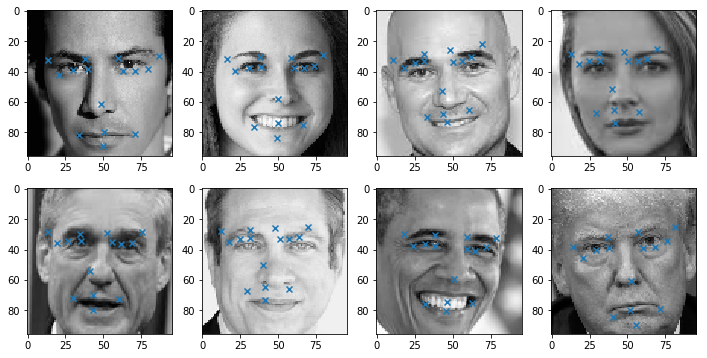

In [65]:
plt.figure(0, figsize=(12,6))
for i in range(1,9):
    plt.subplot(2,4,i)
    plt.imshow(X[i-1,:,:,0], cmap='gray')
    plt.scatter(y[i-1, range(0, 30, 2)], y[i-1, range(1, 30, 2)], marker='x')
plt.show()